In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

* Getting the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/marcopeix/AppliedTimeSeriesAnalysisWithPython/main/data/jj.csv')
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


* Splitting data

In [4]:
train = df[:-4]
test = df[-4:]

* Historical mean

In [5]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

* Set historical mean as a forecast

In [6]:
test.loc[:, 'pred_mean'] = historical_mean

* computing mape

In [11]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) * 100

In [12]:
mape_hist_mean = mape(test['data'], test['pred_mean']) 
print(mape_hist_mean)

70.00752579965119


* plotting prediction

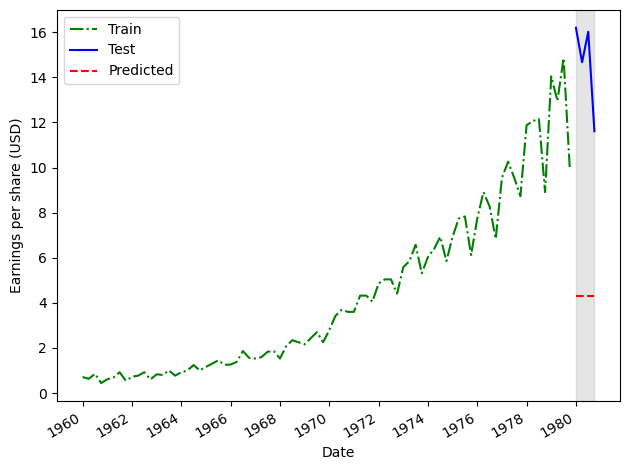

In [13]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train') 
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted') 
ax.set_xlabel('Date') 
ax.set_ylabel('Earnings per share (USD)') 
ax.axvspan(80, 83, color='#808080', alpha=0.2) 
ax.legend(loc=2)
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate() 
plt.tight_layout()

* Using last year's mean

In [14]:
last_year_mean = np.mean(train.data[-4:])
last_year_mean

12.96

In [15]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean']) 
print(mape_last_year_mean)

15.5963680725103
